In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [3]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8)


model = LinearRegression().fit(X_train, y_train)


Notes:

In this exercise, I'm employing linear regression and have divided the dataset into training and testing sets. This split ensures that a random process will yield the same results every time, promoting code reproducibility. Shuffling the dataset is vital for consistent training since not shuffling would result in different datasets each time.

To achieve this, I'm utilizing the `train_test_split` function. I've allocated a test size of 20% of the entire dataset and defined a random state. The random state value maintains dataset consistency, producing the same dataset for a given integer value.

The `fit` method used in this exercise trains the model. It takes an array of features as parameters and an array representing the response to these features.

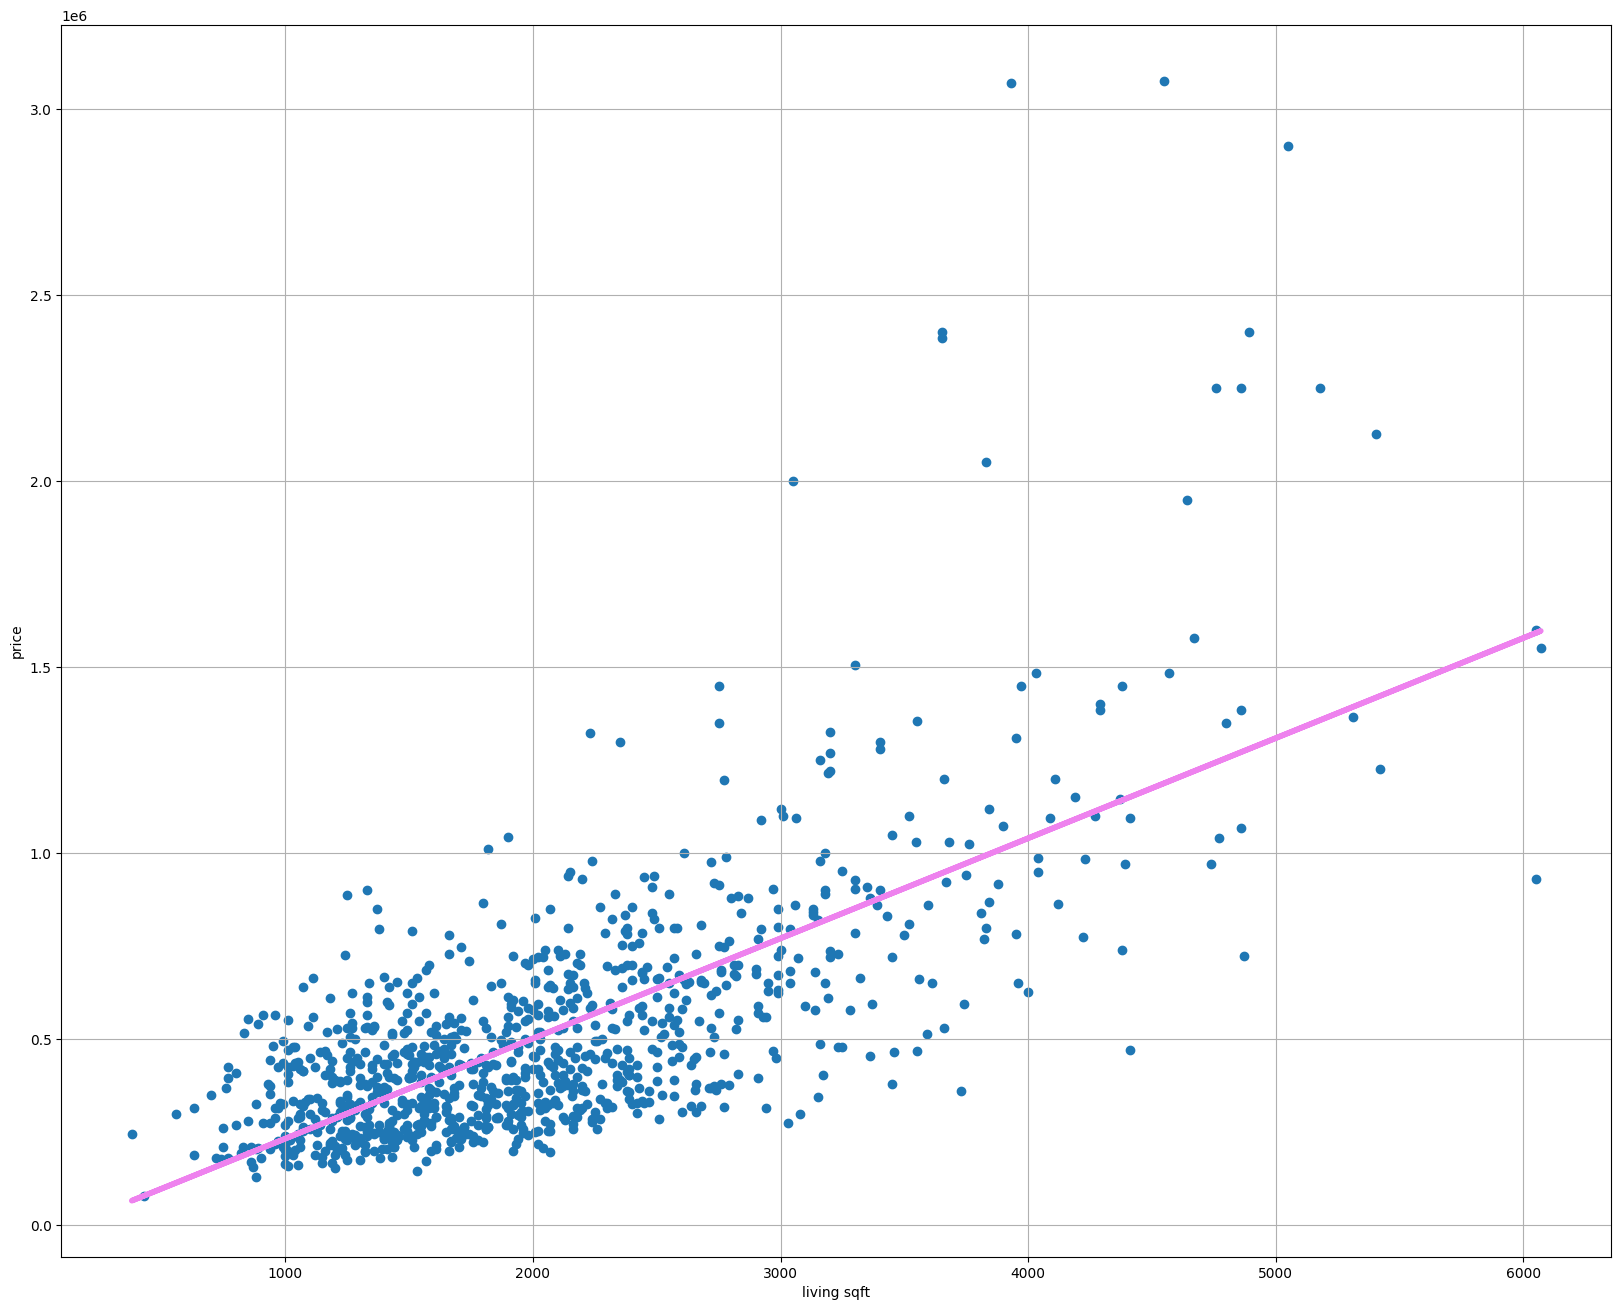

In [4]:
#b)

#Your code:
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlabel('living sqft')
ax.set_ylabel('price')

ax.plot(X, (model.intercept_ + X * model.coef_), 'violet', linewidth=4)
ax.scatter(X, y)
ax.grid()


Notes:

In the chart above, we observe a relatively weak correlation between the house `price` and the `living sqft` parameter. This may be due to the fact that a larger apartment does not always translate to a higher house price.

Additionally, we are using a linear regression model, represented by the violet line fitted through the data. According to the sklearn documentation, this line is plotted to be as close as possible to all data points on average. However, because the regression model is simple, it can be challenging to fit it perfectly to this dataset.

In [5]:
ms = model.score(X_test, y_test)
mse = mean_squared_error(X_test, y_test)

print('Model score is:', ms)
print('Mean squared error is:', mse)

Model score is: 0.45633091104987145
Mean squared error is: 395001974936.53


Notes:

To assess the quality of the model, I used the `mean_squared_error` method, which is a crucial metric for evaluating the performance of our predictive model. It quantifies the average squared difference between the predicted and actual target values within the dataset.

The `score` method is employed to determine the model's accuracy. As we can see, the model's score is 0.456, indicating that the model explains approximately 45.6% of the variance in the target variable.

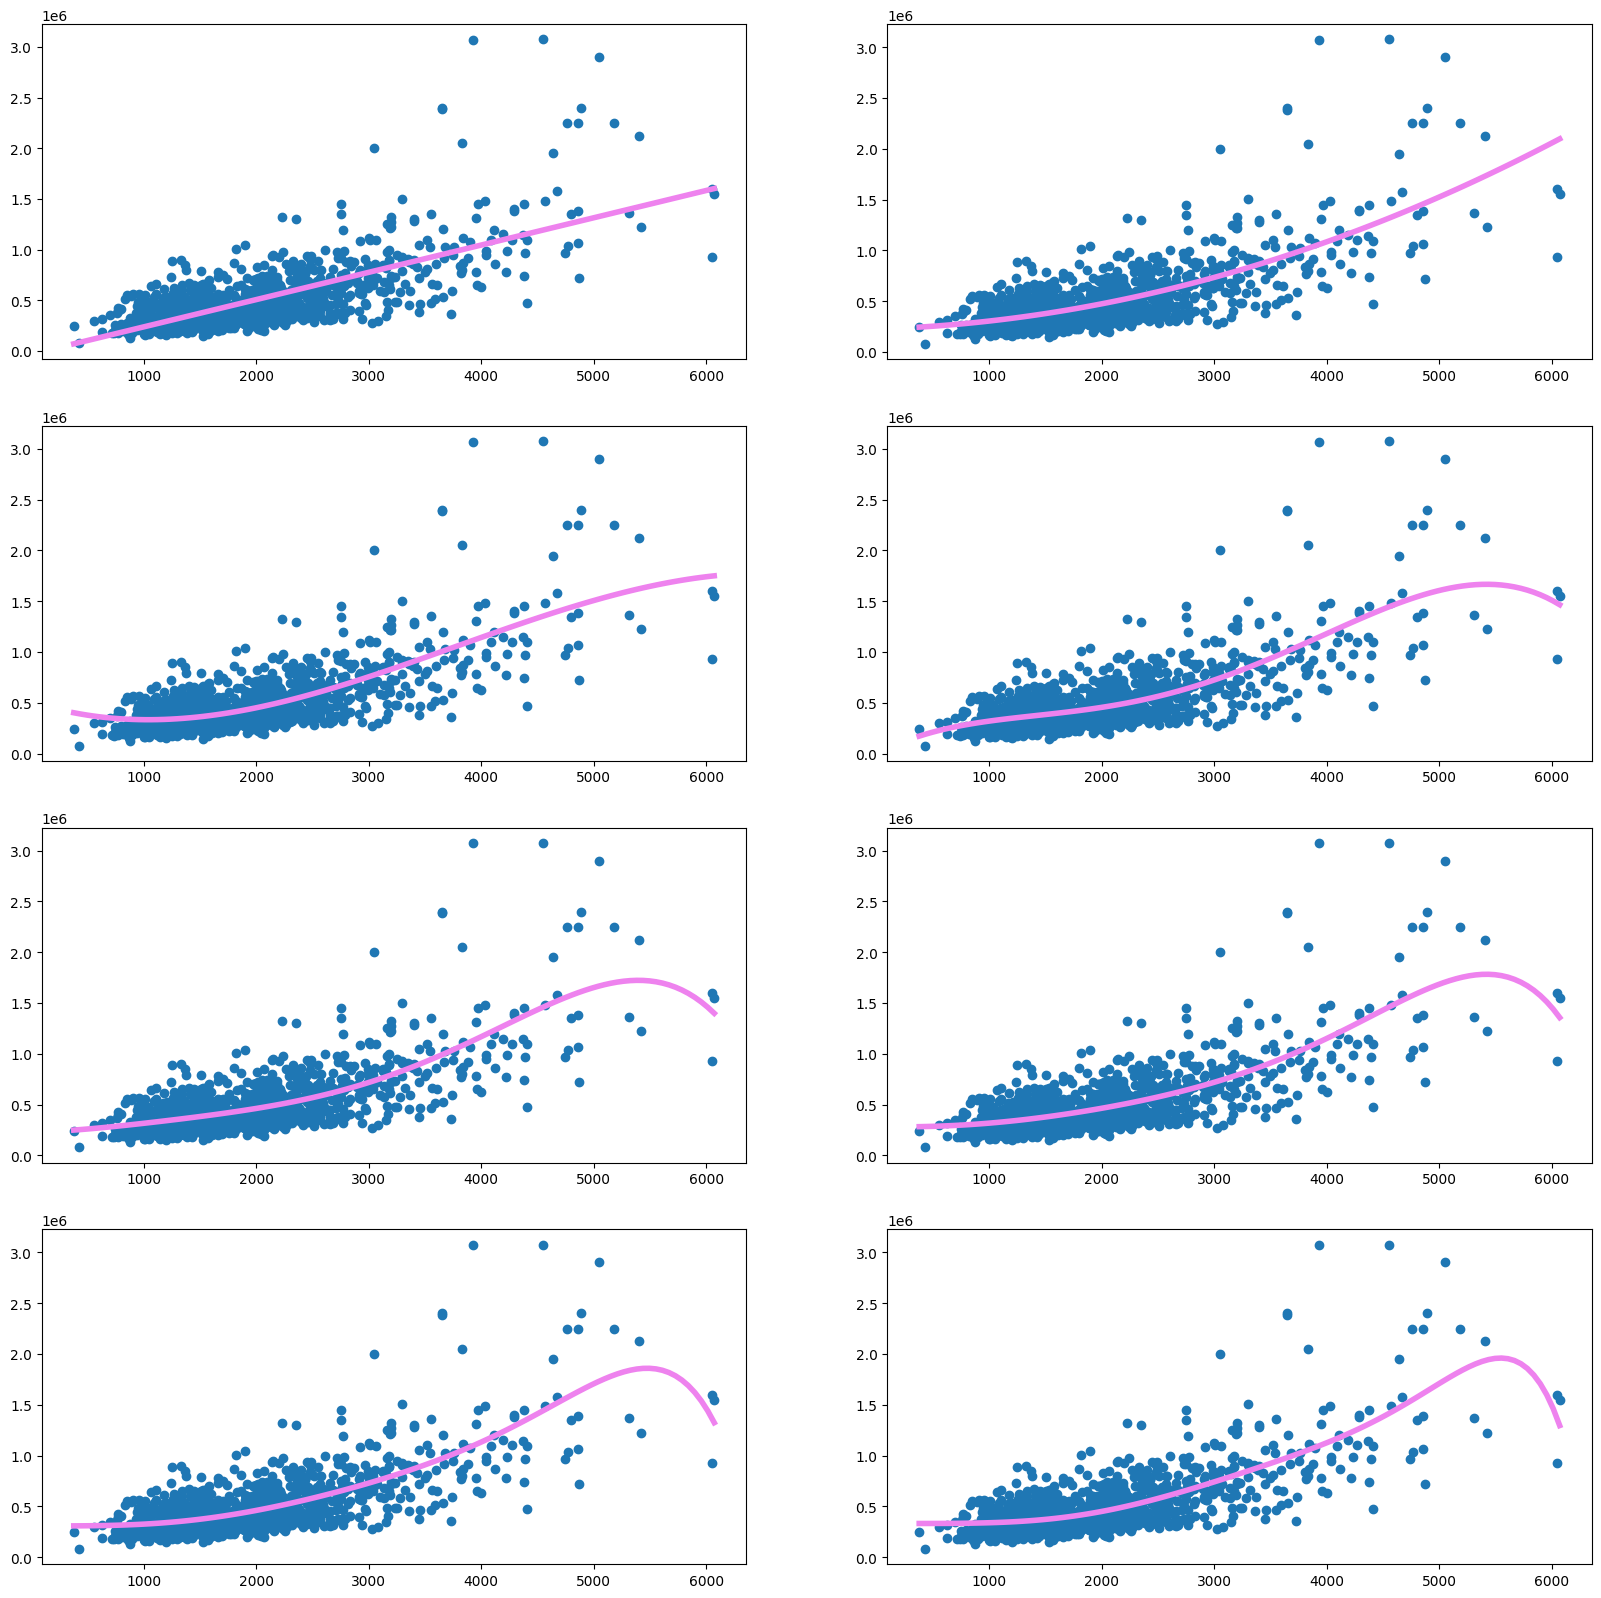

In [6]:
#c)
mean_array = []
fig, ax = plt.subplots(4, 2, figsize =(20, 20))

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    model.fit(X_order, y)

    X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    X_range_ordering = poly.transform(X_range)

    y_predict = model.predict(X_range_ordering)

    column_queueing = 0 if order % 2 == 1 else 1

    ax[(order - 1) // 2, column_queueing].scatter(X, y)
    ax[(order - 1) // 2, column_queueing].plot(X_range, y_predict, 'violet', linewidth=4)

    mean_array.append(mean_squared_error(y, model.predict(X_order)))



Notes:

In the chart above, we observe that as the polynomial order increases, the regression fits better to the training dataset. It's noticeable that as the polynomial order increases, the error becomes smaller. However, it's important to be cautious as higher polynomial orders can lead to worse predictions.

Increasing the polynomial order in a polynomial regression model can result in poorer predictions due to a overfitting. It occurs when a model becomes overly complex and starts fitting noise or random fluctuations in the training data rather than the underlying pattern or trend. This can result in poor generalization to new, unseen data.

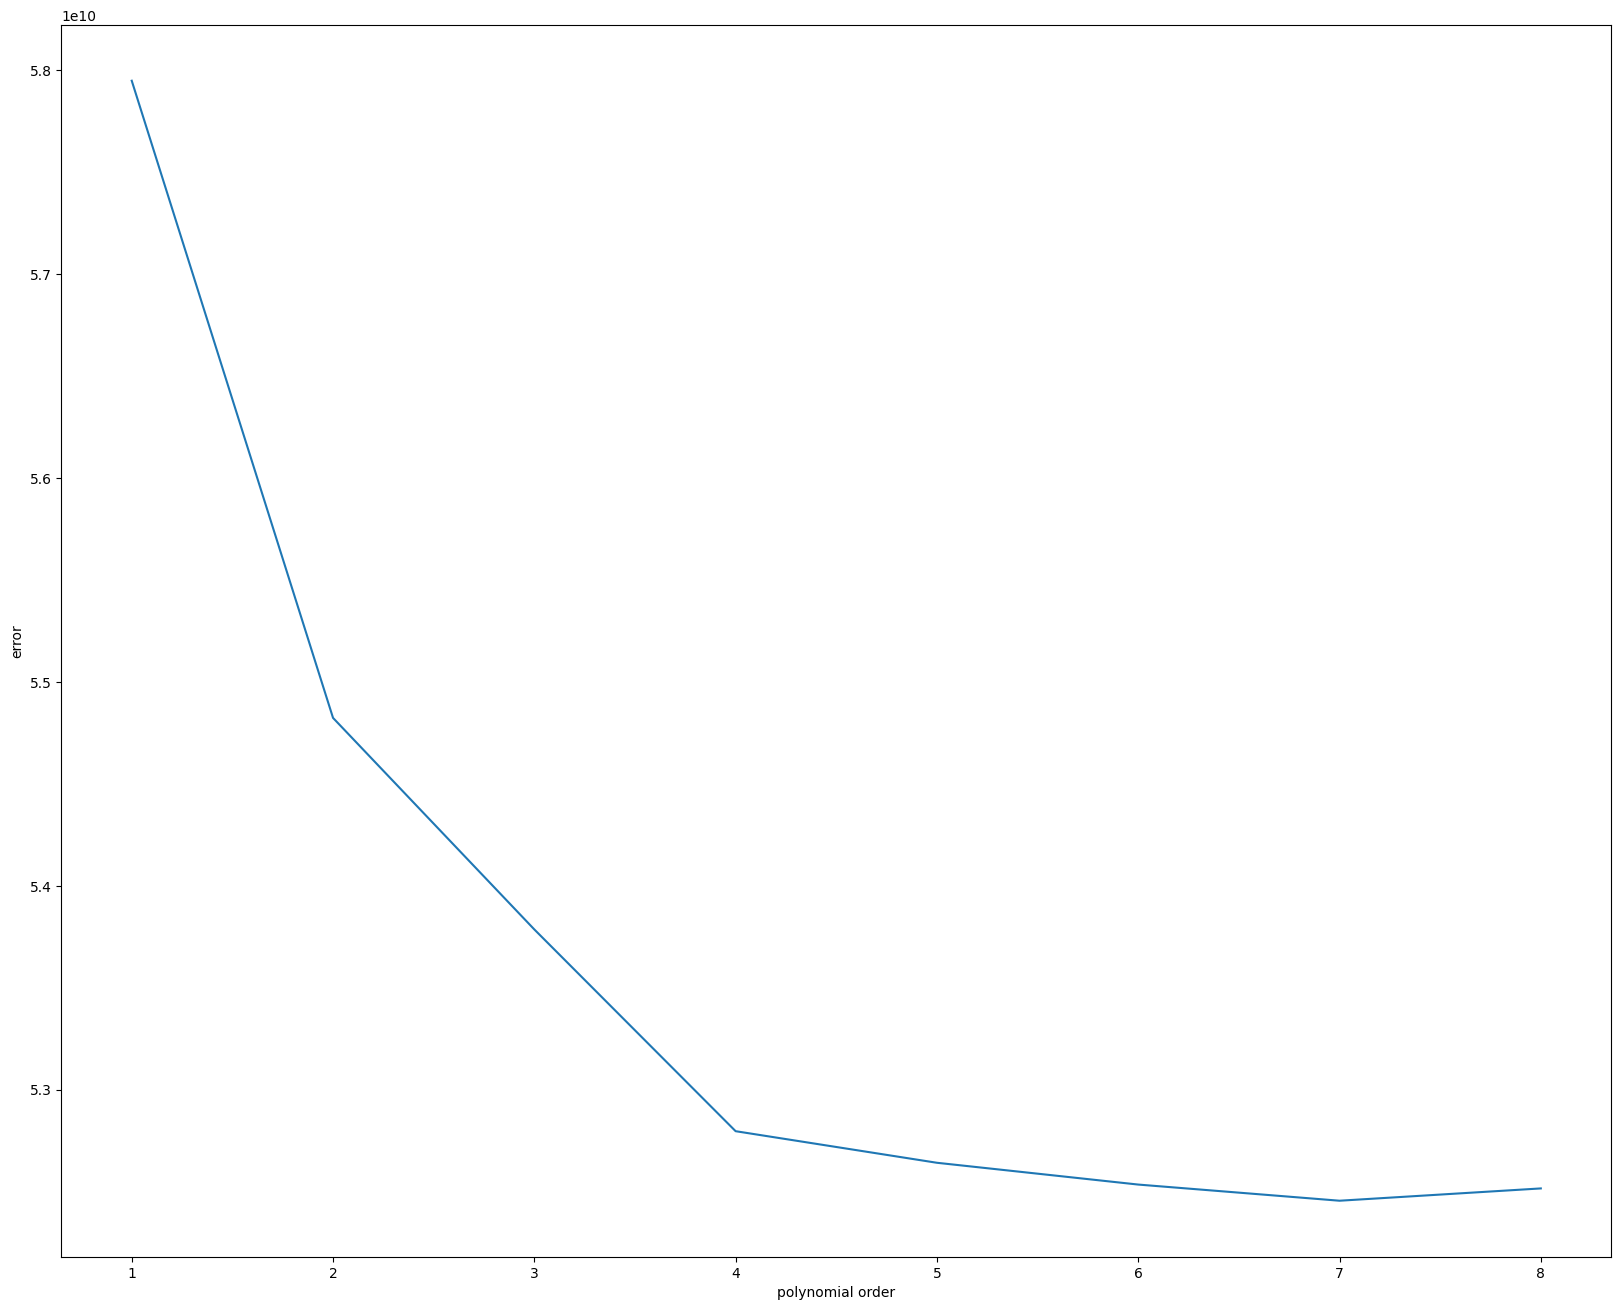

In [11]:
#Your code:
degree = list(range(1, 9))
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlabel('polynomial order')
ax.set_ylabel('error')
ax.plot(degree, mean_array)

Notes:

The chart above illustrates the relationship between the average error and the polynomial order. It confirms what I mentioned earlier. With higher polynomial orders, the model fits the data better, resulting in smaller errors. Nevertheless, it's important to be mindful with high polynomial orders. As shown in the plot, beyond the 4th order, the model's quality doesn't improve significantly, and after the 7th order, the average error starts to increase.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

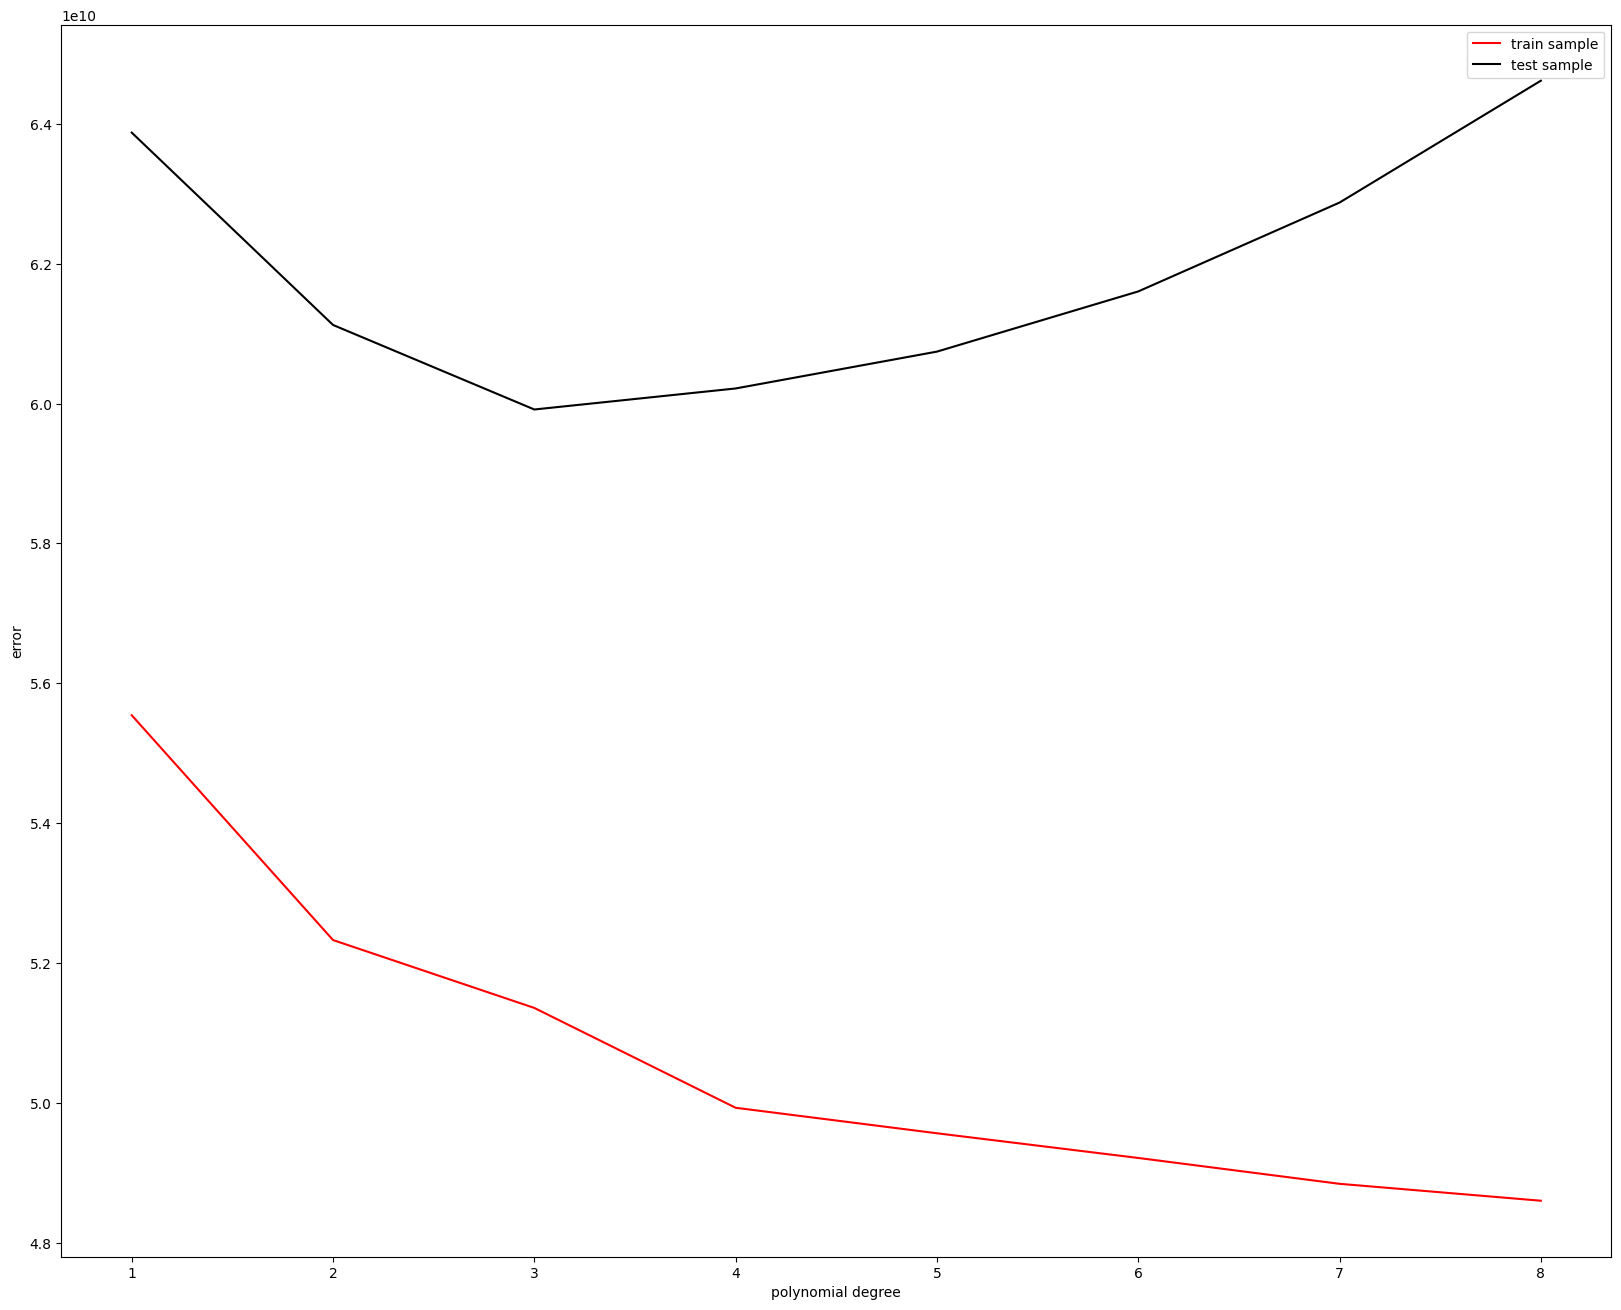

In [39]:
#a)
train_sample = []
test_sample = []



for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    model.fit(X_train, y_train)

    y_predict = model.predict(X_train)
    train_sample.append(mean_squared_error(y_train, y_predict))

    y_predict = model.predict(X_test)
    test_sample.append(mean_squared_error(y_test, y_predict))

fig, ax = plt.subplots(figsize=(20, 16))
ax.plot(degree, train_sample, 'red', label='train sample')
ax.plot(degree, test_sample, 'black', label='test sample')
plt.xlabel('polynomial degree')
plt.ylabel('error')

plt.legend()

Notes:

This plot illustrates the performance of the test sample (black line) and the training sample (red line). It's clear that the training data is more accurate than the test data. What's particularly intriguing is the behavior of the testing sample. Despite the expectation that the average error would decrease as the polynomial order increases, we observe the opposite result.

In an attempt to understand the results on the plot, I altered the `random state` of the `train_test_split` method and made some interesting observations. When the random state is set to 40, we do not observe an increase in the average error in the testing sample.

So such behavior may be attributed to the `random state` parameter of the `train_test_split` function. Its value ensures the same dataset for a given integer value. Therefore, these results could occur because some data from the original dataset is challenging to fit to the curve.


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

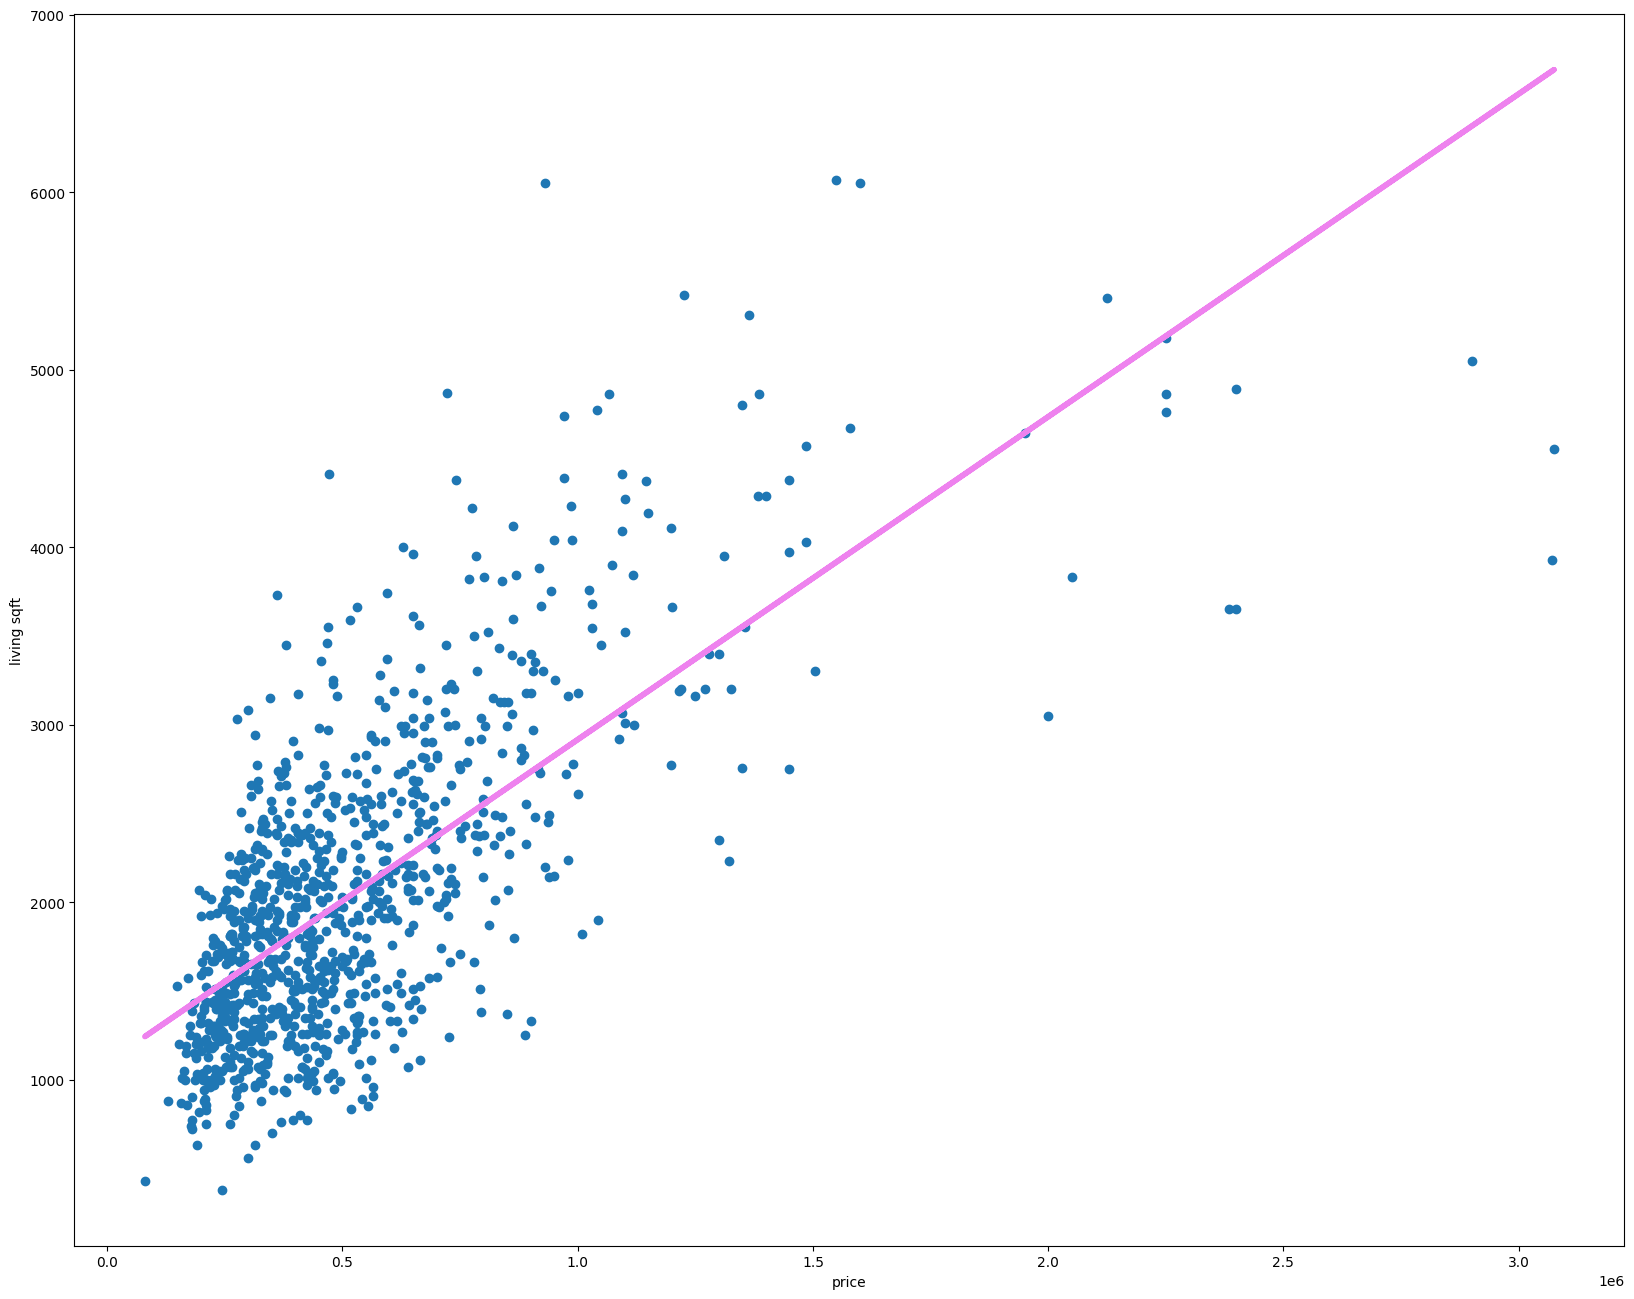

In [42]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LinearRegression()
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlabel('price')
ax.set_ylabel('living sqft')

ax.plot(X, (model.intercept_ + X * model.coef_ ), 'violet', linewidth=4)
ax.scatter(X, y)


In [9]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749250331.21729


In [51]:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 42373622724.277664


In [50]:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms']].values.reshape(-1,5)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 160535022128.22552
